# 画像認識 ~VGGNetと Inception-v3


有名な画像認識モデルであるVGGとinceptionを試してみよう  
すでに学習ずみのmodelをkerasが提供している   
他にも学習済みmodelが色々あるので試してみよう( [keras公式](https://keras.io/ja/applications/) )

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate -O elephant.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/320px-African_Bush_Elephant.jpg

--2018-05-24 19:16:28--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/320px-African_Bush_Elephant.jpg
Resolving upload.wikimedia.org... 103.102.166.240
Connecting to upload.wikimedia.org|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40029 (39K) [image/jpeg]
Saving to: ‘elephant.jpg’

elephant.jpg        100%[===================>]  39.09K  --.-KB/s    in 0.09s   

2018-05-24 19:16:29 (434 KB/s) - ‘elephant.jpg’ saved [40029/40029]




windowsならurllibで代用
```
import urllib.request
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/320px-African_Bush_Elephant.jpg','elephant.jpg')
```

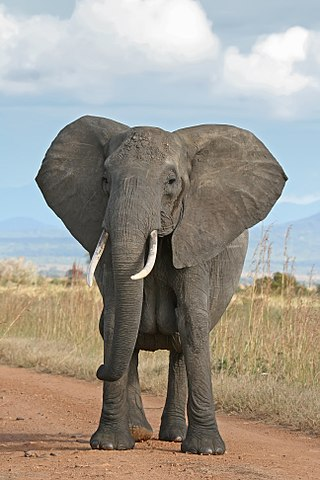

In [6]:
from IPython.display import Image
Image("elephant.jpg")

## Inception v3

In [7]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [8]:
model = InceptionV3(weights='imagenet') #重みはあるものを使う#

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))#299×299の画像#
x = image.img_to_array(img)#行列化
x = np.expand_dims(x, axis=0)#inceptionのinputの次元に合わせる
x = preprocess_input(x)

_pred = model.predict(x)

96116736/96112376 [==============================] - 59s 1us/step


In [9]:
pred = decode_predictions(_pred, top=4)[0] #_predの結果に適合するものtop4
print('Predicted:')
print(pred[0])
print(pred[1])
print(pred[2])
print(pred[3])

40960/35363 [==================================] - 1s 15us/step
Predicted:
('n02504458', 'African_elephant', 0.84657198)
('n01871265', 'tusker', 0.11767872)
('n02504013', 'Indian_elephant', 0.0010202802)
('n02391049', 'zebra', 0.00027841164)


## VGG

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [11]:
model = VGG16(weights='imagenet')

In [15]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

_pred = model.predict(x)

In [16]:
pred = decode_predictions(_pred, top=3)[0]
print('Predicted:')
print(pred[0])
print(pred[1])
print(pred[2])

Predicted:
('n02504458', 'African_elephant', 0.88718551)
('n01871265', 'tusker', 0.10736066)
('n02504013', 'Indian_elephant', 0.0053898706)
